<a href="https://colab.research.google.com/github/hhumayune/Fake-News-Detector/blob/master/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
# importing libraries
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt


# importing dataset
# change path here
true_path = '/content/drive/MyDrive/News-_dataset/True.csv'
fake_path = '/content/drive/MyDrive/News-_dataset/Fake.csv'

true_df = pd.read_csv(true_path)
fake_df = pd.read_csv(fake_path)

In [132]:
# briefly visualizing the datasets
display(true_df)
display(fake_df)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


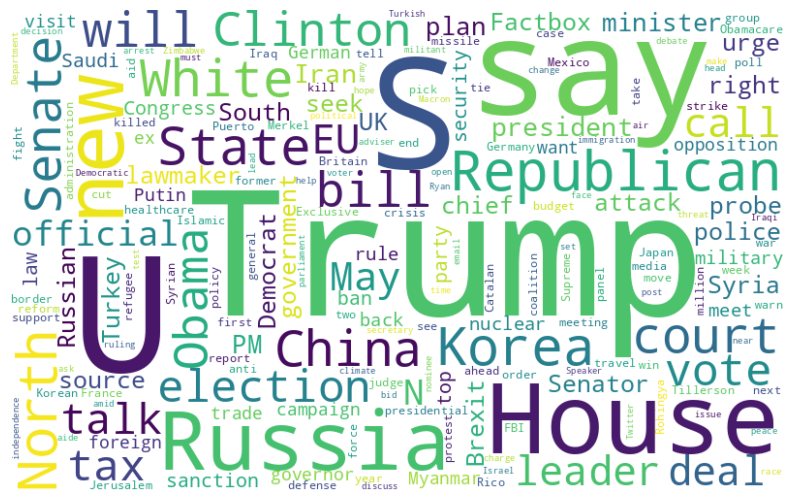

In [133]:
# Real news wordcloud

from wordcloud import WordCloud

real_titles = true_df.title
real_titles_ls = [text for text in real_titles]
# print(alls)
real_all_words = ' '.join(real_titles)
wordcloud_real = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(real_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()

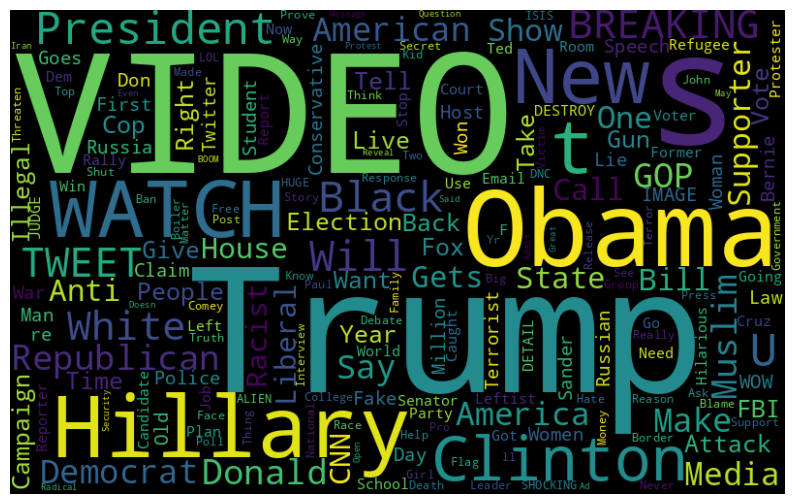

In [134]:
# Fake news worldcloud
fake_titles = fake_df.title
fake_titles_ls = [text for text in fake_titles]
# print(alls)
fake_all_words = ' '.join(fake_titles)
wordcloud_fake = WordCloud(background_color='black',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(fake_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

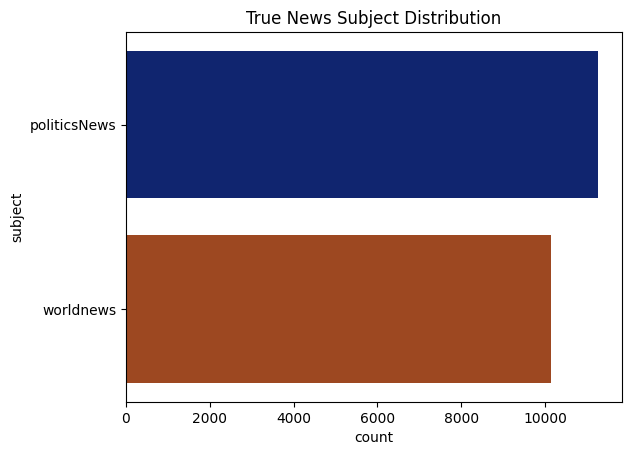

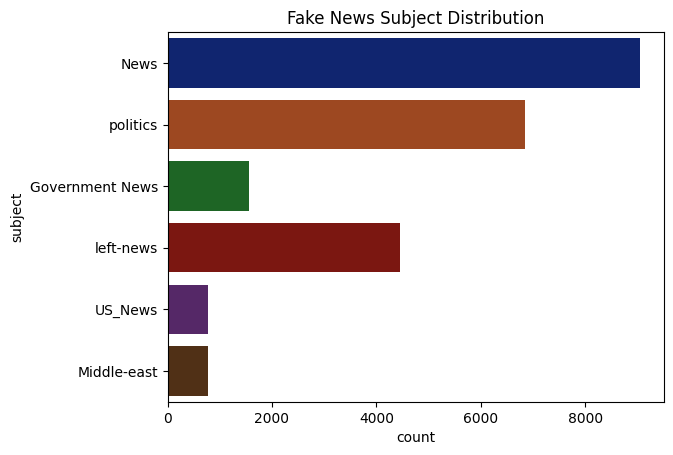

In [135]:
# More visualization
sns.countplot(y="subject", palette="dark", data=true_df).set_title('True News Subject Distribution')
plt.show()
sns.countplot(y="subject", palette="dark", data=fake_df).set_title('Fake News Subject Distribution')
plt.show()

In [136]:
# Data preprocessing part
# Data combination
# Adding Labels to both df
true_df['true'] = 1
fake_df['true'] = 0
# Concat. this basically adds true_df and fake_df
df = pd.concat([true_df, fake_df])
# Purifying only keep title
df = df.iloc[:,[0, -1]]
# Shuffling the data
df = shuffle(df).reset_index(drop=True)
# displaying again
display(df)


,title,true
0,LOL! HIGH SCHOOL STUDENTS Skip School To Prote...,0
1,"(Video) Mark Levin on Trump vs Ramos, Illegal ...",0
2,German coalition talks could stretch into Satu...,1
3,LOL! ANTI-TRUMP ACTORS George Clooney and Matt...,0
4,Iraqi forces remove Kurdish flag from Kirkuk g...,1
...,...,...
44893,Philippines says 'big possibility' Malaysian m...,1
44894,ROY MOORE WITCH HUNT UNRAVELLING: More Witness...,0
44895,Nevada judge rejects Trump request for order o...,1
44896,SHE’S GOT THE SCOOP! CATHERINE HERRIDGE: “Obam...,0


In [137]:
# Preprocessing functions for eliminating noise
def preprocess_text(text):
    # Replace characters that are not between a to z or A to Z with whitespace
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert all characters into lower-case ones. This doesnt really matter if you use BERT
    text = text.lower()
    # Remove inflectional morphemes like "ed", "est", "s", and "ing" from their token stem
    text = re.sub('(ed|est|s|ing)$', '', text)
    return text

# Apply preprocessing to the title column
df['title'] = df['title'].apply(preprocess_text)
display(df)

,title,true
0,lol high school students skip school to prote...,0
1,video mark levin on trump vs ramos illegal ...,0
2,german coalition talks could stretch into satu...,1
3,lol anti trump actors george clooney and matt...,0
4,iraqi forces remove kurdish flag from kirkuk g...,1
...,...,...
44893,philippines says big possibility malaysian m...,1
44894,roy moore witch hunt unravelling more witness...,0
44895,nevada judge rejects trump request for order o...,1
44896,she s got the scoop catherine herridge obam...,0


In [138]:
#  Splitting the Dataset into Training, Validation, Test 

train_val_df = df.sample(frac = 0.8)
test_df = df.drop(train_val_df.index)

train_df = train_val_df.sample(frac = 0.8)
val_df = train_val_df.drop(train_df.index)

# Reset Index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)
print('testset size:', test_df.shape)
     

trainset size: (28734, 2)
valset size: (7184, 2)
testset size: (8980, 2)


In [139]:
# dataset to csv
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

# concat again
df = pd.concat([train_df, val_df, test_df])
display(df)

,title,true
0,house won t vote on healthcare law before brea...,1
1,trump s using this shady sneaky tactic to th...,0
2,u s willing if asked to facilitate talks be...,1
3,former obama spokesliar to join nbc as paid fa...,0
4,u s senate panel approves carson for housing ...,1
...,...,...
8975,white house spokesman spicer out as trump seek...,1
8976,defense chief mattis in asia will discuss nor...,1
8977,the democrat who wrote a paper about how women...,0
8978,republican tax plan a blow to democratic state...,1


In [140]:
# Word embedding starts here
# Tokenize the text data

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['title'])
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
sequences = tokenizer.texts_to_sequences(df['title'])

#sequence length set to 42
max_sequence_length = 42  

# Pad sequences
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Split the data into input (X) and output (y) variables
y = df['true']

# Build the LSTM model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 100, input_length=max_sequence_length))
model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
model.fit(X, y, batch_size=32, epochs=5, validation_split=0.2)
model.save('my_model.h5')

# Load the saved model
loaded_model = load_model('my_model.h5')

# Evaluate the loaded model
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/5
1123/1123 [==============================] - 80s 69ms/step - loss: 0.1284 - accuracy: 0.9497 - val_loss: 0.0847 - val_accuracy: 0.9694
Epoch 2/5
1123/1123 [==============================] - 77s 69ms/step - loss: 0.0363 - accuracy: 0.9875 - val_loss: 0.0844 - val_accuracy: 0.9696
Epoch 3/5
1123/1123 [==============================] - 78s 69ms/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.1046 - val_accuracy: 0.9692
Epoch 4/5
1123/1123 [==============================] - 77s 69ms/step - loss: 0.0097 - accuracy: 0.9966 - val_loss: 0.1201 - val_accuracy: 0.9679
Epoch 5/5
1123/1123 [==============================] - 77s 69ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.1480 - val_accuracy: 0.9651
Test loss: 0.02857404574751854
Test accuracy: 0.9916477203369141


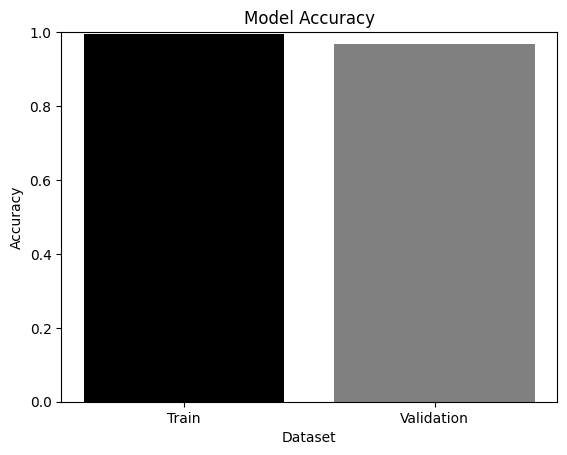

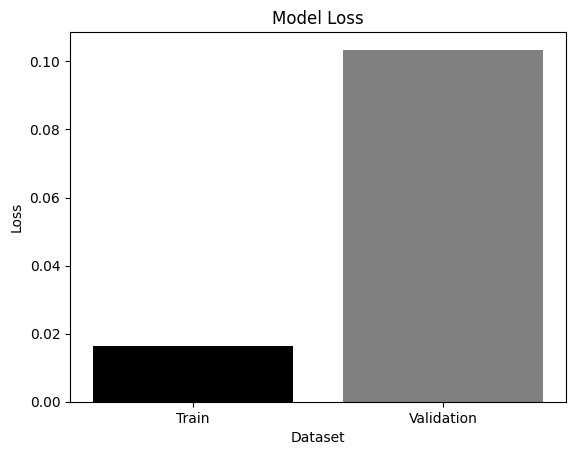

In [141]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.bar(['Train', 'Validation'], [history.history['accuracy'][-1], history.history['val_accuracy'][-1]], color=['black', 'grey'])
plt.title('Model Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

# Plot loss
plt.bar(['Train', 'Validation'], [history.history['loss'][-1], history.history['val_loss'][-1]], color=['black', 'grey'])
plt.title('Model Loss')
plt.xlabel('Dataset')
plt.ylabel('Loss')
plt.show()



In [143]:
#For checking results
title_input = input("Enter a news title: ")

# Preprocess the title
preprocessed_title = preprocess_text(title_input)

# Tokenize and pad the preprocessed title
sequence = tokenizer.texts_to_sequences([preprocessed_title])
padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)

# Predict the authenticity of the title
prediction = loaded_model.predict(padded_sequence)[0]

# Print the result
if prediction >= 0.5:
    print("The news is true.")
else:
    print("The news is fake.")


Enter a news title: White House says tax bill will not hurt Puerto Rico
1/1 [==============================] - 0s 16ms/step
The news is true.
